# California Iteration

Keenan and James

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

import re

%matplotlib inline

quakes = pd.read_csv("./data/data.csv")

print quakes.head()

                       time  latitude  longitude  depth  mag magType  nst  \
0  1901-08-09T18:33:00.000Z        40        144      0  7.5      mw  NaN   
1  1901-08-09T13:01:00.000Z       -22        170      0  7.9      mw  NaN   
2  1902-04-19T02:23:00.000Z        14        -91      0  7.5      mw  NaN   
3  1902-09-23T20:18:00.000Z        16        -93      0  7.8      mw  NaN   
4  1902-09-22T01:46:00.000Z        18        146      0  7.5      mw  NaN   

   gap  dmin  rms    ...                      updated  \
0  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
1  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
2  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
3  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
4  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   

                                       place        type horizontalError  \
0        off the east coast of Honshu, Japan  earthquake             NaN   
1           southeast of the Loyalty Islan

We wrote some helper functions that will help us test the progress we have made in the models quickly.

In [4]:
from sklearn.cross_validation import train_test_split

def cross_validate(model, X, y, cv=3):
    return cross_validation.cross_val_score(model, X, y, cv=cv).mean()

def train_test_splitter(model, X, y, train_size=0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
    model.fit(X_train, y_train)
    return X_train, X_test, y_train, y_test, model

### Features

In [73]:
def magclassify(mag):
    if mag < 3:
        return 0
    elif mag < 4:
        return 1
    elif mag < 5:
        return 2
    elif mag < 6:
        return 3
    elif mag < 7:
        return 4
    elif mag < 8:
        return 5
    elif mag >= 8:
        return 6
# "tiny", minor" "light" "moderate" "strong" "major" "great"   

def classifyMagType(magType):
    duration = ["Md", "md"]
    local = ["ml"]
    shortPS = ["mb_lg", "lg", "mblg"]
    shortPeriodWave = ["mb"]
    twenty = ["ms", "ms_20"]
    moment = ["mi", "mwp"]
    energy = ["me"]
    
    mw = ["mw", "mwb", "mwc","mwr","mww"]
    magType = str(magType).lower()
    if magType in duration:
        return 0
    elif magType in local:
        return 1
    elif magType in shortPS:
        return 2
    elif magType in shortPeriodWave:
        return 3
    elif magType in twenty:
        return 4
    elif magType in moment:
        return 5
    elif magType in energy:
        return 6
    elif magType in mw:
        return 7
    else:
        return 8    
    
def parse_date(Dates):
    return int(Dates[0:4]), int(Dates[5:7]), int(Dates[8:10]), int(Dates[11:13])

In [7]:
def add_features():
    quakes["magClassified"] = quakes["mag"].apply(magclassify)
    quakes["depth"] = quakes["depth"].fillna(quakes["depth"].median())
    quakes["magTypeClassified"] =  quakes["magType"].apply(classifyMagType)
    quakes["year"] = quakes.time.apply(lambda x: parse_date(x)[0])
    quakes["month"] = quakes.time.apply(lambda x: parse_date(x)[1])
    quakes["hour"] = quakes.time.apply(lambda x: parse_date(x)[3])

In [8]:
add_features()

In [9]:
logistic = LogisticRegression()
random = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=4, min_samples_leaf=8)

models = {'Logistic': logistic, 'RandomForest': random}

In [10]:
def train_test_splitter(model, X, y, train_size=0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
    model.fit(X_train, y_train)
    return X_train, X_test, y_train, y_test, model

# iterates over all different models and print out their results of train_test_splitter
def test_models(models, X, y):
    for modelName, model in models.iteritems():
        print modelName
        X_train, X_test, y_train, y_test, model = train_test_splitter(model, X, y, train_size=0.5)
        print model.score(X_test, y_test)

In [11]:
predictors = ["latitude", "longitude", "depth"]
X_train, X_test, y_train, y_test = train_test_split(quakes[predictors], quakes.magClassified, train_size=.5)
alg.fit(X_train, y_train)
alg.score(X_test, y_test)

NameError: name 'alg' is not defined

In [13]:
predictors = ["latitude", "longitude", "depth", "magTypeClassified", "year", "month","hour"]
X_train, X_test, y_train, y_test = train_test_split(quakes[predictors], quakes.magClassified, train_size=.5)
alg.fit(X_train, y_train)
alg.score(X_test, y_test)

0.85619126363964548

In [57]:
from geopy.geocoders import Nominatim

geolocator = Nominatim()
# location = geolocator.reverse("-6.0326, 103.7117")
location = geolocator.reverse("42.2926850,-71.2644100")
# location = geolocator.reverse("33.7787,-38.0533")
print location.address

Milas Hall, Olin Way, Needham, Norfolk County, Massachusetts, 02492-1200, United States of America


In [12]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
encoding = encoder.fit_transform(quakes.country)
quakes["countryEncoding"] =  pd.Series(encoding, index=quakes.index)

AttributeError: 'DataFrame' object has no attribute 'country'

In [45]:
def latLongToAddress(lat, longi):
    array = []
    for i in range(len(lat)):
        array.append(str(lat[i]) + ", " + str(longi[i]))
    return array

In [13]:
quakes.magClassified.value_counts()

2    298257
1    177877
0    131733
3     68246
4      9522
5      1241
6        92
Name: magClassified, dtype: int64

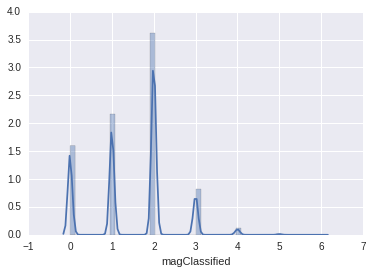

In [14]:
sns.distplot(quakes.magClassified)

In [15]:
quakes["country"] = quakes.place.apply(lambda x: str(x).split(", ")[-1])
# quakes["country"] = quakes.country.apply(lambda x: str(x).split(", ")[-1])
# quakes.loc[quakes["country"] == "male", "Sex"] = 0
# quakes.loc[quakes.country.value_counts() == 1, "country"] = "else"
print type(quakes.country.value_counts())
print quakes.country.value_counts()

<class 'pandas.core.series.Series'>
Indonesia                                  41514
Alaska                                     37083
CA                                         34014
Chile                                      33567
Japan                                      24219
California                                 21970
Papua New Guinea                           21812
Greece                                     19337
Mexico                                     17996
Philippines                                12731
Japan region                               11730
western Turkey                             11572
Fiji region                                10139
Kuril Islands                               8995
Argentina                                   8972
Vanuatu                                     8397
MX                                          8064
Russia                                      7881
Central Alaska                              7787
Tonga                            

In [16]:
okc = quakes[quakes["country"] =="Oklahoma"]
# okc = quakes[quakes["country"] =="Ok"]
len(okc)

5685

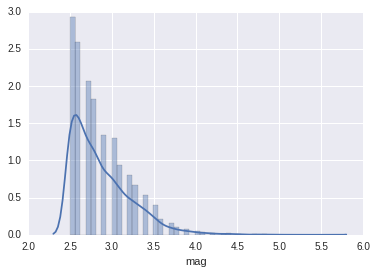

In [17]:
sns.distplot(okc.mag)

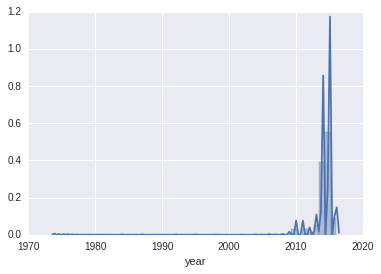

In [18]:
sns.distplot(okc.year)

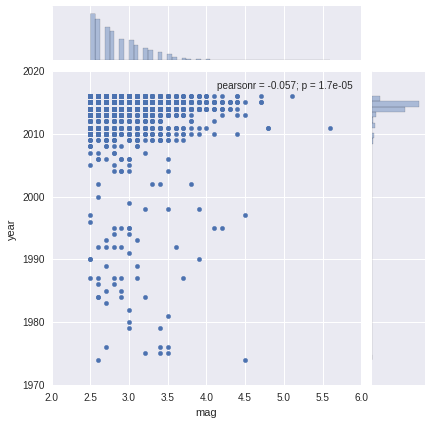

In [19]:
sns.jointplot(okc.mag, okc.year)

In [20]:
predictors = ["latitude", "longitude"]
test_models(models, okc[predictors], okc.magClassified)

RandomForest
0.628561378825
Logistic
0.679563841013


In [21]:
ca = quakes[(quakes["country"] =="California")| (quakes["country"] =="CA")]
# okc = quakes[quakes["country"] =="Ok"]
len(ca)

55984

7.7000000000000002

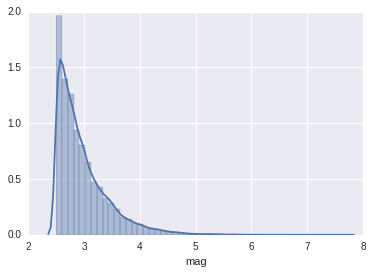

In [74]:
sns.distplot(ca.mag)

max(ca.mag)

# ca.magClassified.unique()

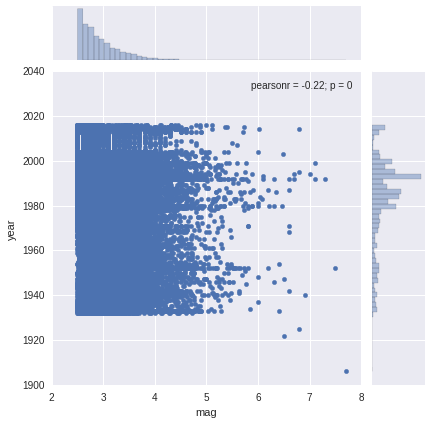

In [36]:
sns.jointplot(ca.mag, ca.year)

In [45]:
print (ca.mag.value_counts())

2.50    2234
2.60    1309
2.70    1228
2.80    1149
2.51     932
2.55     911
2.61     894
2.54     889
2.57     878
3.00     872
2.56     870
2.53     864
2.90     863
2.52     858
2.59     844
2.58     836
2.65     802
2.63     797
2.62     792
2.67     769
2.64     733
2.66     719
2.69     701
2.68     701
2.74     697
2.71     664
2.76     645
2.72     638
2.78     621
2.73     613
        ... 
6.31       1
5.46       1
5.11       1
5.49       1
7.50       1
6.07       1
5.16       1
5.21       1
5.57       1
5.90       1
5.64       1
5.58       1
7.70       1
5.52       1
6.35       1
5.54       1
4.94       1
6.03       1
6.90       1
6.48       1
5.65       1
5.25       1
5.88       1
5.50       1
5.48       1
5.09       1
6.47       1
5.66       1
6.22       1
5.35       1
Name: mag, dtype: int64


In [25]:
predictors = ["latitude", "longitude", "depth", "year", "month","hour"]
test_models(models, quakes[predictors], quakes.magClassified)

RandomForest
0.697153288072
Logistic
0.52247848517


In [174]:
predictors = ["latitude", "longitude", "year", "month", "hour"]
X_train, X_test, y_train, y_test = train_test_split(quakes[predictors], quakes.magClassified, train_size=.5)
logistic.fit(X_train, y_train)
logistic.score(X_test, y_test)

0.6869402941621735

In [183]:
quakes.groupby("magClassified").count()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,combined,country,magTypeClassified,year,month,hour,test,t,countryEncoding,Sex
magClassified,,,,,,,,,,,,,,,,,,,,,
0,309610,309610,309610,309610,309610,309489,201511,187192,42272,172925,...,309610,309610,309610,309610,309610,309610,309610,309610,309610,0
1,298257,298257,298257,298257,298257,298248,142460,152900,34884,253576,...,298257,298257,298257,298257,298257,298257,298257,298257,298257,0
2,68246,68246,68246,68246,68246,68244,22612,22735,3752,51789,...,68246,68246,68246,68246,68246,68246,68246,68246,68246,0
3,9522,9522,9522,9522,9522,9522,1969,1931,346,4736,...,9522,9522,9522,9522,9522,9522,9522,9522,9522,0
4,1241,1241,1241,1241,1241,1241,194,193,37,474,...,1241,1241,1241,1241,1241,1241,1241,1241,1241,0
5,92,92,92,92,92,92,19,19,2,31,...,92,92,92,92,92,92,92,92,92,0


In [220]:
for i in range(1):
    a=  logistic.predict_proba([42.2926850+i,-71.2644100-i, 2016, 3, 12])
    print weighted(a[0])
    
def weighted(a):
    s= 0
    for i in range(6):
        s += i *a[i]
    return s/6

0.0559032820271


/Users/bumho/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [10]:
latLong = pd.DataFrame({
        'latitude': np.array(quakes.latitude), 
        'longitude': np.array(quakes.longitude)})

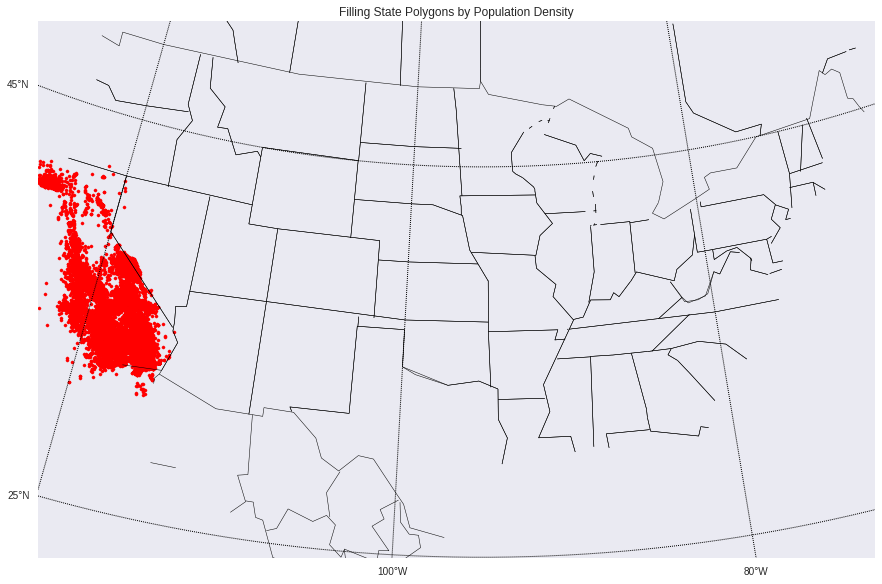

In [32]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

plt.figure(figsize=(15,15))
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcountries()
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
m.drawstates()
# x,y = m(np.array(okc.longitude), np.array(okc.latitude))
# m.scatter(x,y ,10,marker='o',color='b')

x,y = m(np.array(ca.longitude), np.array(ca.latitude))
m.scatter(x,y ,10,marker='o',color='r')

plt.title('Filling State Polygons by Population Density')
plt.show()

In [50]:
def get_marker_color(magnitude):
    if magnitude < 3.0:
        return ('wo') # tiny
    elif magnitude < 4.0:
        return ('go') # minor
    elif magnitude < 5.0:
        return ('yo') # light
    elif magnitude < 5.0:
        return ('mo') # moderate
    elif magnitude < 6.0:
        return ('ro') # strong
    elif magnitude < 7.0:
        return ('ko') # major
    else:
        return ('ko') # great
    

# Transitioning to California

We decided to move to focusing on the data around California, as the whole globe was a little ambitious. We started by using Basemap limited to the California and plotted each of the earthquakes with different color values for the magnitude type classified.

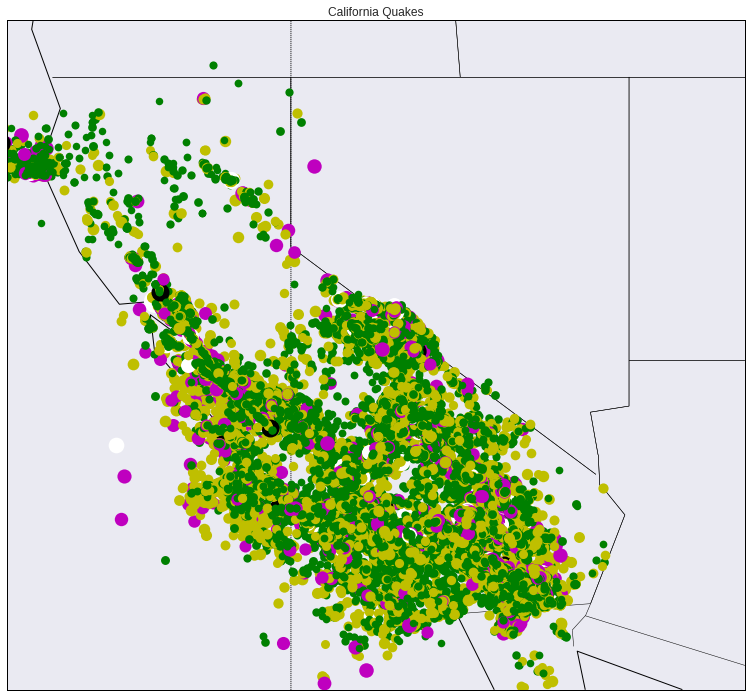

In [51]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16,12))

my_map = Basemap(llcrnrlon=-125, llcrnrlat=31.2, urcrnrlon=-112, urcrnrlat=43, projection='cyl',
              resolution='c' )


lats = np.array(ca.latitude)
longs = np.array(ca.longitude)
mags = np.array(ca.mag)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawstates()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
# my_map.bluemarble()

for lon, lat, mag in zip(longs, lats, mags):
    x,y = my_map(lon, lat)
    marker_string = get_marker_color(mag)
    my_map.plot(x, y, marker_string, markersize=mag*3)
    
plt.title('California Quakes')
plt.show()

As shown, there is a pretty large distribution of earthquakes in Califoria, and of a variety of different types. Looking closely at the clusters, several fault lines seem to emerge, although there are a lot of points in general. We are going to use this data to now make a Kernel Density plot as well as use our Random Forest model to predict the type of earthquake magnitude classifier based on longitude and latitude. 

Let's start by creating our Random Forest Model using only the latitude and longitude as predictors. 

In [133]:
predictors = ["latitude", "longitude"]
alg = RandomForestClassifier(random_state=1, n_estimators=18, min_samples_split=4, min_samples_leaf=9)
X_train, X_test, y_train, y_test = train_test_split(ca[predictors], ca.magClassified, train_size=.5)
alg.fit(X_train, y_train)
alg.score(X_test, y_test)

0.63618176621891964

This gives us a score of about 64%, which isn't great, but we wanted to include the new category of magnitudes that were less that 3.0. If we don't include this statistic, and only have minor which is below 4, our accuracy goes up to around 90% or greater, simply because the large majority of earthquakes are small ones. We also are only using the features of longitude and latitude. 

# Probability Graphs

We used seaborn to generate a bar graph that takes in the latitude and longitude and the model, and based on the predictions from predict_proba, makes a bargraph of which earthquake category type is most probable, given that there *is* an earthquake

In [154]:
import seaborn as sns

def proba_graph(lat, lon, model):
    plt.figure(figsize=(12,8))
    point = [lat, lon]
    prediction = model.predict_proba(point)
    labels = ["tiny", "minor", "light", "moderate", "strong", "major"]    
    
    ax = sns.barplot(labels,prediction[0])
    total = float(len(prediction))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + 0.2, height+0.01, '%1.1f'%(height/total * 100 ),  fontsize=15, )
    
    sns.axlabel("Earthquake Classification Type", "Probability")
    plt.title("Earthquake Magnitude Probabilities")
    plt.ylim([0 ,1])
    
    plt.show()
    
    return prediction
    


/home/keenan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


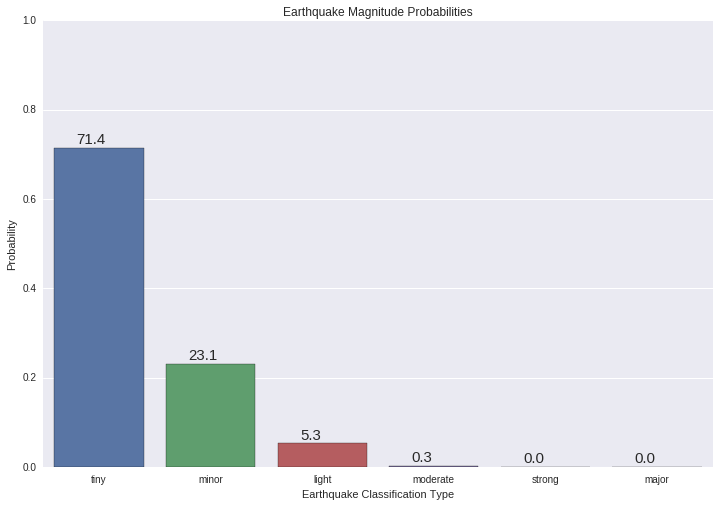

array([[ 0.7139455 ,  0.23056421,  0.05271252,  0.00277778,  0.        ,
         0.        ]])

In [155]:
proba_graph(42, -71, alg)

As shown, for this random point, there is a distribution of probabilities of quakes shown in the graph above. There is only a 0.3% chance for even a moderate earthquake.